# Jay Parmar

# Topic : Stock Price Prediction and Forecasting using Stacked LSTM :

● Predicting the behavior of the stock market has been an area that has attracted many researchers, particularly in the field of Machine Learning and Data Science. Here, we are doing same with the given data.

## Import required libraries :

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

from warnings import filterwarnings
filterwarnings(action='ignore')

## Iris Data Set :

In [2]:
df = pd.read_csv('Stock_price.csv')
df = df.dropna()
df=df.iloc[::-1]
df.head()

,Date,Open,High,Low,Last,Close,Total_Trade_Quantity,turnover(Lacs)
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total_Trade_Quantity,turnover(Lacs)
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [4]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total_Trade_Quantity    0
turnover(Lacs)          0
dtype: int64

In [5]:
df_close = df['Close']

In [6]:
df_close.shape

(2035,)

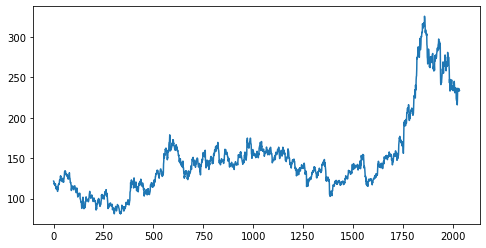

In [7]:
df_close=df.reset_index()['Close']
plt.figure(figsize=(8,4))
plt.plot(df_close)

In [8]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [9]:
df_close.shape

(2035, 1)

In [10]:
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Train and Test Split :

In [11]:
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [12]:
len(train_data)

1526

In [13]:
len(test_data)

509

# Data Preprocessing :

In [14]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [16]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [17]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [18]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

# LSTM :

●    LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is that LSTM can store past important information and forget the information that is not usefull.

●    LSTM has three gates:
* The input gate: The input gate adds information to the cell state,
* The forget gate: It removes the information that is no longer required by the model,
* The output gate: Output Gate at LSTM selects the information to be shown as output.

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 10s 200ms/step - loss: 0.0092 - val_loss: 0.0158
Epoch 2/100
23/23 [==============================] - 3s 138ms/step - loss: 0.0017 - val_loss: 0.0075
Epoch 3/100
23/23 [==============================] - 3s 136ms/step - loss: 9.2316e-04 - val_loss: 0.0048
Epoch 4/100
23/23 [==============================] - 3s 142ms/step - loss: 8.4916e-04 - val_loss: 0.0039
Epoch 5/100
23/23 [==============================] - 3s 147ms/step - loss: 8.1039e-04 - val_loss: 0.0041
Epoch 6/100
23/23 [==============================] - 4s 163ms/step - loss: 7.6715e-04 - val_loss: 0.0057
Epoch 7/100
23/23 [==============================] - 4s 182ms/step - loss: 7.6488e-04 - val_loss: 0.0065
Epoch 8/100
23/23 [==============================] - 4s 172ms/step - loss: 7.3506e-04 - val_loss: 0.0048
Epoch 9/100
23/23 [==============================] - 4s 195ms/step - loss: 6.9480e-04 - val_loss: 0.0036
Epoch 10/100
23/23 [==============================] - 4s 185ms

# Prediction :

In [22]:
#predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

13/13 [==============================] - 1s 46ms/step


In [23]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [24]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

133.42910387206223

In [25]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

222.8405103122028

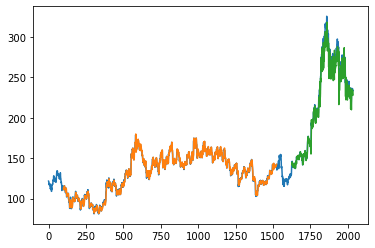

In [26]:
look_back =100

train_df_plot = np.empty_like(df_close)
train_df_plot[:,:]  = np.nan
train_df_plot[look_back:len(train_predict)+look_back, :] = train_predict

test_plot = np.empty_like(df_close)
test_plot[:,:] = np.nan
test_plot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df_close))
plt.plot(train_df_plot)
plt.plot(test_plot)
plt.show()

* Green indicates the Predicted Data
* Blue indicates the Complete Data
* Orange indicates the Train Data

In [27]:
#Predict the next 28 days Stock Price
len(test_data), x_test.shape

(509, (408, 100, 1))

In [31]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.6079093]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [33]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [34]:
day_new.shape

(100,)

In [35]:
day_pred.shape

(30,)

In [36]:
df1 = df_close.tolist()
df1.extend(lst_output)
len(df_close)

2035

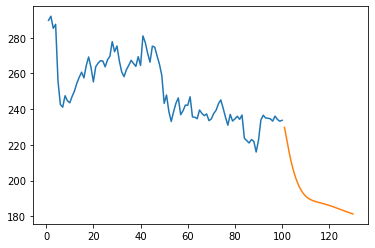

In [37]:
plt.plot(day_new, scaler.inverse_transform(df_close[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

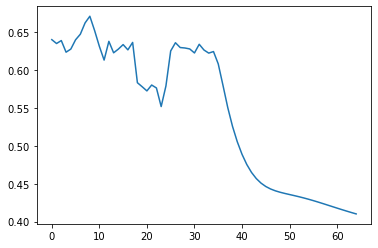

In [38]:
df1=df_close.tolist()
df1.extend(lst_output)
plt.plot(df1[2000:])

In [39]:
df1=scaler.inverse_transform(df1).tolist()

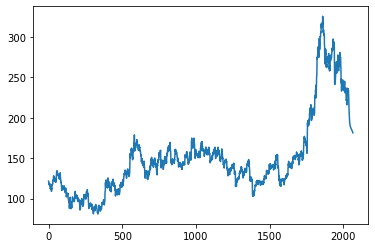

In [40]:
plt.plot(df1)

## Conclusion :

● From the above graph, we can say that, in the beginning company started growthing but, for the last some time company's stock price is decreasing.